In [1]:
import ast
import os
import pandas as pd
import sys

sys.path.append(os.path.expanduser('~/covid/covid-social-distancing/python/'))
import db_util

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
con = db_util.connect_postgres()

/Users/sandy.ryza/.virtualenvs/kt/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


##  Hourly visits at a Safeway

In [4]:
safeway_hourly_visits = pd.read_sql("""
    select
        sf_safeway_hourly_visits.date_range_start,
        hour_of_week,
        visits
    from sf_safeway_hourly_visits
    join sf_safeways using (safegraph_place_id)
    where true
        and street_address = '2020 Market St'
""", con)

/Users/sandy.ryza/.virtualenvs/kt/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1151: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,


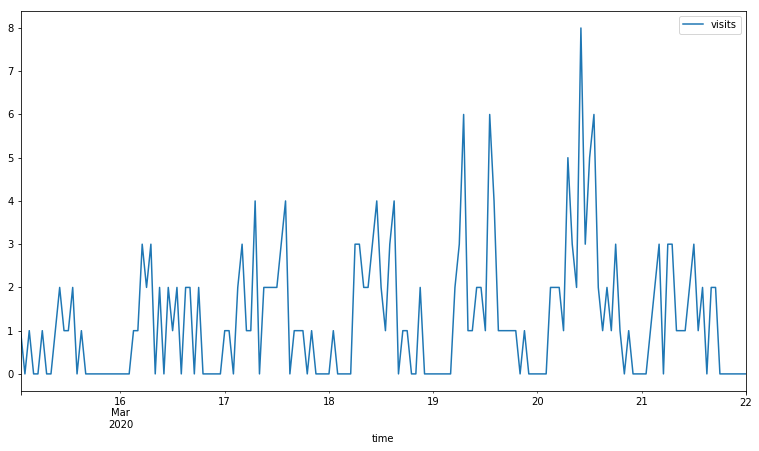

In [5]:
safeway_hourly_visits['time'] = safeway_hourly_visits['date_range_start'] + \
    safeway_hourly_visits['hour_of_week'].apply(lambda x: pd.DateOffset(hours=x))

safeway_hourly_visits.plot.line(x='time', y='visits', figsize=(13, 7))

## Most visited places

In [6]:
pd.read_sql("""
    select
        raw_visit_counts,
        location_name,
        street_address,
        city,
        region
    from weekly_patterns
    order by raw_visit_counts desc
    limit 20
""", con)

,raw_visit_counts,location_name,street_address,city,region
0,999,Starbucks,975 E 3rd St,Chattanooga,TN
1,999,Northpark Village Square,27756 McBean Pkwy,Valencia,CA
2,999,Pro Laser Printers,805 Glynn St S Ste 127-246,Fayetteville,GA
3,999,Medallion Shopping Center,6464 Northwest Highway East,Dallas,TX
4,999,Willow Plaza Shopping Center,698 W Shaw Ave # 790,Clovis,CA
5,999,Westminster Crossing,200 Clifton Blvd,Westminster,MD
6,999,Frederick Shopping Center,1305 W 7th St,Frederick,MD
7,999,QuikTrip,2001 S Bowie Dr,Weatherford,TX
8,999,Heather Gardens Golf Course,2888 S Heather Gardens Way,Aurora,CO
9,999,Rockland Center,43 E Route 59,Nanuet,NY
